<a href="https://colab.research.google.com/github/IkhwanRosli/ImageSimilarityDetection/blob/master/Image_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Why this code are written?
During my internship,  I was involved in a project which required the uses of machine learning. These machine learning are required to classify images uploaded by the user(Type of plant. E.g. Banana, Paddy) and doing object detection to the images(Detect the diseases and pest infecting the plants using computer vision and machine learning). Long story short, we required the help of expert to label the images - where are the diseases and the pest.


Unfortunately, the expert labelled the images manually without using LabelImg  - An open source GUI which can help user label images with ease. Therefore, I need to  search the same images among hundreds of others. This may take a long of time  and energy to do it manually. Thus , Waalllllaaaaaa.... The code is written.

In [0]:
from skimage.measure import compare_ssim as ssim
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import os

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Method Used
For the method to check the similarities, I am using Structural Similarity and Mean Square Error. The Structural Similarity index was completed by the Laboratory of Computational Vision (LCV) in New York University and widely used to measuring similarities between two images. While, Mean Square Error is a estimator which calculate the average squared differences between the estimated value and what is estimated. The closer the value to zero, the better the similarities.

In [0]:
def mse(A,B):
  #Check the Mean Squared Error between 2 images.
  #The lowest the mse, the similar the picture.
  err = np.sum((A.astype("float") - B.astype("float")) ** 2)
  err /= float(A.shape[0] * A.shape[1])
  return err

def compare_img(A,B):
  m = mse(A,B)
  s = ssim(A,B)
  
  return m,s

def upload_files():
  from google.colab import files
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())

Saving WhatsApp Image 2019-05-27 at 3.44.42 PM.jpeg to WhatsApp Image 2019-05-27 at 3.44.42 PM.jpeg
Saving WhatsApp Image 2019-05-27 at 3.46.15 PM.jpeg to WhatsApp Image 2019-05-27 at 3.46.15 PM.jpeg
Saving WhatsApp Image 2019-05-27 at 3.46.18 PM.jpeg to WhatsApp Image 2019-05-27 at 3.46.18 PM.jpeg
Saving WhatsApp Image 2019-05-27 at 3.46.28 PM.jpeg to WhatsApp Image 2019-05-27 at 3.46.28 PM.jpeg
Saving WhatsApp Image 2019-05-27 at 3.46.16 PM.jpeg to WhatsApp Image 2019-05-27 at 3.46.16 PM.jpeg
['WhatsApp Image 2019-05-27 at 3.44.42 PM.jpeg', 'WhatsApp Image 2019-05-27 at 3.46.15 PM.jpeg', 'WhatsApp Image 2019-05-27 at 3.46.18 PM.jpeg', 'WhatsApp Image 2019-05-27 at 3.46.28 PM.jpeg', 'WhatsApp Image 2019-05-27 at 3.46.16 PM.jpeg']


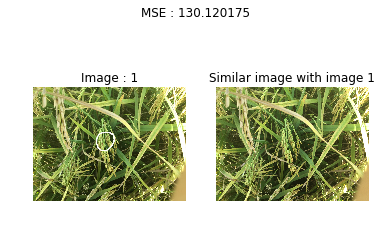

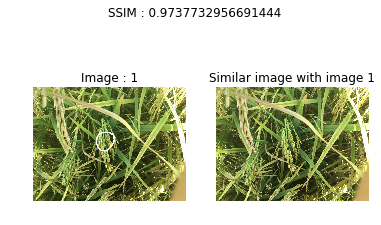

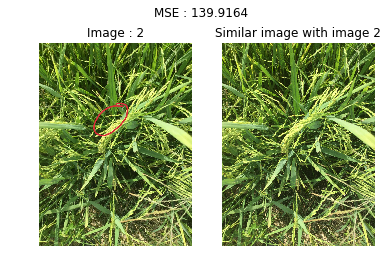

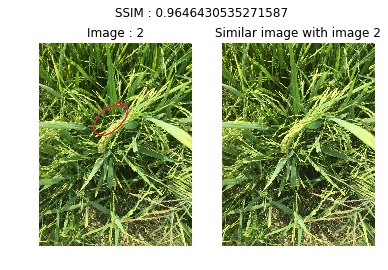

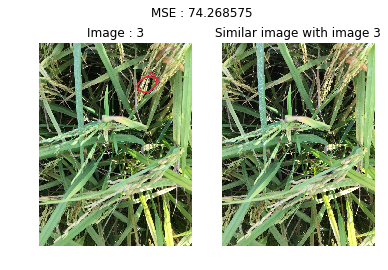

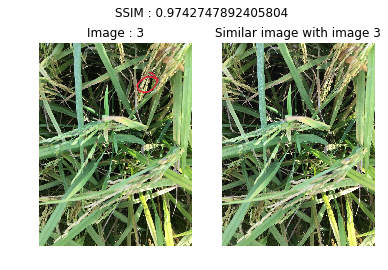

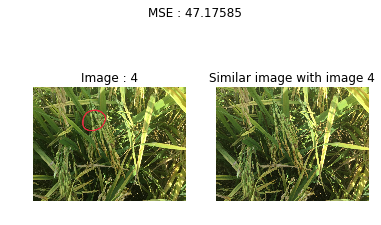

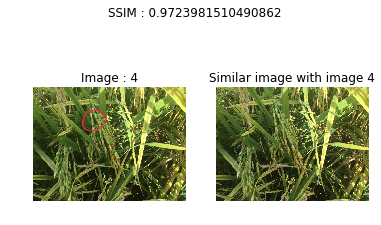

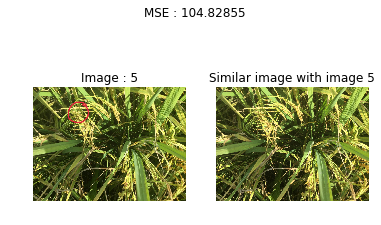

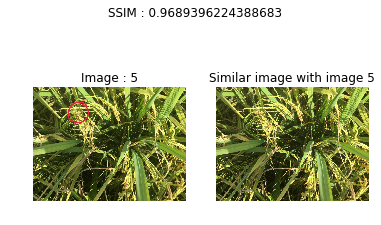

In [5]:
from google.colab import files

items = upload_files()
count = 0
print(items)
for each_image in items:
  if each_image.endswith(".jpg") or each_image.endswith(".jpeg"):
    count += 1
    original = cv2.imread(each_image)
    originalBW = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    originalBW = cv2.resize(originalBW,(200,200))
    ori = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

    lowMse = 99999999
    highSS = 0


    for filename in glob.glob("/content/drive/My Drive/Gambar Padi/*.JPG"):
      test = cv2.imread(filename)
      testBW = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
      testBW = cv2.resize(testBW,(200,200))
      m,s = compare_img(originalBW,testBW)
      if m < lowMse:
        lowMse = m
        highestmse = filename
        namemse = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
      if s > highSS:
        highSS = s
        highestSS = filename
        nameSS = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)

    for filename in glob.glob("/content/drive/My Drive/Gambar Padi/*.jpeg"):
      test = cv2.imread(filename)
      testBW = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
      testBW = cv2.resize(testBW,(200,200))

      m,s = compare_img(originalBW,testBW)
      if m < lowMse:
        lowMse = m
        highestmse = filename
        namemse = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
      if s > highSS:
        highSS = s
        highestSS = filename
        nameSS = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
        
    fig = plt.figure(highestmse)
    plt.suptitle("The Similarity Based on Mean Squared Error")
    plt.suptitle("MSE : {}".format(lowMse))

    ax = fig.add_subplot(1,2,1)
    plt.title('Image : {}'.format(count))
    plt.imshow(ori)
    plt.axis("off")

    ax = fig.add_subplot(1,2,2)
    plt.title('Similar image with image {}'.format(count))
    plt.imshow(namemse)
    plt.axis("off")

    plt.show()
    
    fig = plt.figure(highestSS)
    plt.suptitle("SSIM : {}".format(highSS))

    ax = fig.add_subplot(1,2,1)
    plt.title('Image : {}'.format(count))
    plt.imshow(ori)
    plt.axis("off")

    ax = fig.add_subplot(1,2,2)
    plt.title('Similar image with image {}'.format(count))
    plt.imshow(nameSS)
    plt.axis("off")

    plt.show()
  

Credit to PyImageSearch for the guidance :D Here is the link : https://www.pyimagesearch.com/2014/09/15/python-compare-two-images/ 
These code are written to be compatible with google colab thus, if you want to use it in jupyter notebook, some changes need to be made. Furthermore, the data cannot be distributed as it is confidential